In [ ]:
# import sys

In [ ]:
# sys.path = ['', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '/home/harshad/learning/tutorial-env/CV/hw1/CV/lib/python3.8/site-packages']

In [ ]:
# import torch

In [ ]:
# torch.__version__

<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Neural Networks for Recognition - Assignment 3

     Instructor: Kris Kitani                       TAs: Arka, Jinkun, Rawal, Rohan, Sheng-Yu

## Q4 PyTorch (40 points)

**Please include all the write up answers below to HW3:PDF. For the questions that need code, you need to include the screenshot of code to PDF submission to get points.**

While you were able to derive manual back-propagation rules for sigmoid and fully-connected layers, wouldn't it be nice if someone did that for lots of useful primatives and made it fast and easy to use for general computation?  Meet [automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation). Since we have high-dimensional inputs (images) and low-dimensional outputs (a scalar loss), it turns out **forward mode AD** is very efficient. Popular autodiff packages include [pytorch](https://pytorch.org/) (Facebook), [tensorflow](https://www.tensorflow.org/) (Google), [autograd](https://github.com/HIPS/autograd) (Boston-area academics). Autograd provides its own replacement for numpy operators and is a drop-in replacement for numpy, except you can ask for gradients now. The other two are able to act as shim layers for [cuDNN](https://developer.nvidia.com/cudnn), an implementation of auto-diff made by Nvidia for use on their GPUs. Since GPUs are able to perform large amounts of math much faster than CPUs, this makes the former two packages very popular for researchers who train large networks. Tensorflow asks you to build a computational graph using its API, and then is able to pass data through that graph. PyTorch builds a dynamic graph and allows you to mix autograd functions with normal python code much more smoothly, so it is currently more popular among CMU students. 

We will use [pytorch](https://pytorch.org/) as a framework. Many computer vision projects use neural networks as a basic building block, so familiarity with one of these frameworks is a good skill to develop. Here, we basically replicate and slightly expand our handwritten character recognition networks, but do it in PyTorch instead of doing it ourselves. Feel free to use any tutorial you like, but we like [the offical one](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) or [this tutorial](http://cs231n.stanford.edu/notebooks/pytorch_tutorial.ipynb) (in a jupyter notebook) or [these slides](http://cs231n.stanford.edu/slides/2018/cs231n_2018_lecture08.pdf (starting from number 35).

**For this section, you're free to implement these however you like. All of the tasks required here are fairly small and don't require a GPU if you use small networks, including 4.2.**

### Q4.1 Train a neural network in PyTorch

#### Q4.1.1 (10 Points Code+WriteUp)
 
Re-write and re-train your fully-connected network on NIST36 in PyTorch. Plot training accuracy and loss over time.

<font color="red">**Please include your answer to HW3:PDF**</font>

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from ipynb.fs.defs.q1 import *
import scipy.io
import torch.nn.functional as F

training_data = scipy.io.loadmat('data/nist36_train.mat')
train_x, train_y = training_data['train_data'], training_data['train_labels']
train_x, train_y = torch.from_numpy(train_x).float(),torch.from_numpy(train_y).float()

# load_train_data = DataLoader(TensorDataset(train_x, train_y))

batch_size = 8

# Create data loaders.
train_dataloader = DataLoader(TensorDataset(train_x, train_y), batch_size=batch_size, shuffle=True)

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
# class NeuralNetwork(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.flatten = nn.Flatten()
#         self.linear_relu_stack = nn.Sequential(
#             nn.Linear(1024, 64),
#             nn.Sigmoid(),
#             nn.Linear(64, 36),
#             nn.Softmax(dim=1),
#             # nn.Linear(512, 10)
#         )

#     def forward(self, x):
#         x = self.flatten(x)
#         logits = self.linear_relu_stack(x)
#         return logits

# model = NeuralNetwork().to(device)

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1024, 64)
        self.output = nn.Linear(64, 36)
        
    def forward(self, x):
        x = self.hidden(x)
        x = torch.sigmoid(x)
        x = self.output(x)
        x = F.log_softmax(x,dim=1)
        
        return x


model = Network()

print(model)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=5e-3)

    
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    avg_acc = 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = nn.functional.cross_entropy(pred, y)
        _, acc = compute_loss_and_acc(y.detach().numpy(), pred.detach().numpy())
        avg_acc += acc/len(train_dataloader)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    
    print("Loss = ", loss)
    print("Acc = ", avg_acc)
    return avg_acc, loss.detach().numpy()


epochs = 50
acc_arr = []
loss_arr = []
itr_arr = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    acc, l = train(train_dataloader, model, loss_fn, optimizer)
    acc_arr.append(acc)
    loss_arr.append(l)
    itr_arr.append(t)
print("Done!")

import matplotlib.pyplot as plt
plt.plot(itr_arr,acc_arr, label = "Train data")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(itr_arr,loss_arr, label = "Train data")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss")
plt.show()

In [ ]:
# list(model.parameters())
torch.__version__

In [ ]:
# torch.from_numpy(train_x).shape

In [ ]:
# from torch.utils.data import DataLoader, TensorDataset

# dataset = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))

# dataloader = DataLoader(dataset, batch_size)

In [ ]:
# a, b = next(iter(dataloader))

In [ ]:
# criterion = nn.CrossEntropyLoss()

# output = Variable(torch.randn(10, 120).float())
# target = Variable(torch.FloatTensor(10).uniform_(0, 120).long())

# loss = criterion(output, target)

In [ ]:
# import torch
# from torch import nn
# from torch.utils.data import DataLoader
# from torch.utils.data import Dataset, TensorDataset
# from torchvision import datasets
# from torchvision.transforms import ToTensor
# import scipy.io


# loss = nn.CrossEntropyLoss()
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.empty(3, dtype=torch.long).random_(5)
# print(input.shape, target.shape)
# output = loss(input, target)
# output.backward()
# # Example of target with class probabilities
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.randn(3, 5).softmax(dim=1)
# output = loss(input, target)
# output.backward()

In [ ]:
# loss_fn(torch.rand(3, 4), torch.rand(3, 4))

#### Q4.1.2 (3 Points Code+WriteUp)
 
Train a convolutional neural network with PyTorch on MNIST. Plot training accuracy and loss over time.

<font color="red">**Please include your answer to HW3:PDF**</font>

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

In [ ]:
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            if args.dry_run:
                break

In [ ]:
# import torch
# from torch import nn
# from torch.utils.data import DataLoader, TensorDataset
# from torchvision import datasets
# from torchvision.transforms import ToTensor
# from ipynb.fs.defs.q1 import *
# import scipy.io
# import torch.nn.functional as F

# # Download training data from open datasets.
# training_data = datasets.MNIST(
#     root="data",
#     train=True,
#     download=True,
#     transform=ToTensor(),
# )

# # Download test data from open datasets.
# test_data = datasets.MNIST(
#     root="data",
#     train=False,
#     download=True,
#     transform=ToTensor(),
# )

# batch_size = 64

# # Create data loaders.
# train_dataloader = DataLoader(training_data, batch_size=batch_size)
# test_dataloader = DataLoader(test_data, batch_size=batch_size)

# for X, y in test_dataloader:
#     print(f"Shape of X [N, C, H, W]: {X.shape}")
#     print(f"Shape of y: {y.shape} {y.dtype}")
#     break

# # Get cpu or gpu device for training.
# device = "cuda" if torch.cuda.is_available() else "cpu"
# print(f"Using {device} device")

# # Define model
# # class NeuralNetwork(nn.Module):
# #     def __init__(self):
# #         super().__init__()
# #         self.flatten = nn.Flatten()
# #         self.linear_relu_stack = nn.Sequential(
# #             nn.Linear(1024, 64),
# #             nn.Sigmoid(),
# #             nn.Linear(64, 36),
# #             nn.Softmax(dim=1),
# #             # nn.Linear(512, 10)
# #         )

# #     def forward(self, x):
# #         x = self.flatten(x)
# #         logits = self.linear_relu_stack(x)
# #         return logits

# # model = NeuralNetwork().to(device)

# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 32, 3, 1)
#         self.conv2 = nn.Conv2d(32, 64, 3, 1)
#         self.dropout1 = nn.Dropout(0.25)
#         self.dropout2 = nn.Dropout(0.5)
#         self.fc1 = nn.Linear(9216, 128)
#         self.fc2 = nn.Linear(128, 10)

#     def forward(self, x):
#         x = self.conv1(x)
#         x = F.relu(x)
#         x = self.conv2(x)
#         x = F.relu(x)
#         x = F.max_pool2d(x, 2)
#         x = self.dropout1(x)
#         x = torch.flatten(x, 1)
#         x = self.fc1(x)
#         x = F.relu(x)
#         x = self.dropout2(x)
#         x = self.fc2(x)
#         output = F.log_softmax(x, dim=1)
#         return output



# # model = Network()

# # print(model)

# # loss_fn = nn.CrossEntropyLoss()
# # optimizer = torch.optim.SGD(model.parameters(), lr=5e-3)

    
# # def train(dataloader, model, loss_fn, optimizer):
# def train(train_loader, model, optimizer):
#     size = len(train_loader.dataset)
#     model.train()
#     avg_acc = 0
    
#     for batch, (X, y) in enumerate(train_loader):
#         X, y = X.to(device), y.to(device)

#         # Compute prediction error
#         pred = model(X)
#         loss = F.nll_loss(pred, y)
#         _, acc = compute_loss_and_acc(y.detach().numpy(), pred.detach().numpy())
#         avg_acc += acc/len(train_dataloader)
#         # Backpropagation
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()


    
#     print("Loss = ", loss)
#     print("Acc = ", avg_acc)
#     return avg_acc, loss.detach().numpy()


# epochs = 50
# acc_arr = []
# loss_arr = []
# itr_arr = []
# for t in range(epochs):
#     print(f"Epoch {t+1}\n-------------------------------")
#     acc, l = train(train_dataloader, model, optimizer)
#     acc_arr.append(acc)
#     loss_arr.append(l)
#     itr_arr.append(t)
# print("Done!")

# import matplotlib.pyplot as plt
# plt.plot(itr_arr,acc_arr, label = "Train data")
# plt.xlabel('Iterations')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.title("Accuracy")
# plt.show()

# plt.plot(itr_arr,loss_arr, label = "Train data")
# plt.xlabel('Iterations')
# plt.ylabel('Loss')
# plt.legend()
# plt.title("Loss")
# plt.show()

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
# num_epochs = int(num_epochs)
num_epochs = 5

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
    # 100, 32, 4, 4
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        # Resize
        # Original size: (100, 32, 7, 7)
        # out.size(0): 100
        # New out size: (100, 32*7*7)
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out


model = CNNModel()

if torch.cuda.is_available():
    model.cuda()

loss_fn = nn.CrossEntropyLoss()

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


def train(train_loader, model, loss_fn, optimizer):
    # iter = 0
    # for epoch in range(num_epochs):
    train_correct = 0
    train_total = 0
    for i, (images, labels) in enumerate(train_loader):

        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images)
            labels = Variable(labels)
        print("image shape = ",images.size())
        print("labels shape = ",labels.size())
        # print("images size = ", images)
        # print("labesl size = ", labels)
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        # print("outputs  = ", outputs)
        # Calculate Loss: softmax --> cross entropy loss
        train_loss = loss_fn(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        train_loss.backward()
        
        # Updating parameters
        optimizer.step()
        
            # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        
        # Total number of labels
        train_total += labels.size(0)
        
        # Total correct predictions
        if torch.cuda.is_available():
            train_correct += (predicted.cpu() == labels.cpu()).sum()
        else:
            train_correct += (predicted == labels).sum()

        train_accuracy = 100 * train_correct / train_total
        train_acc_arr.append(train_accuracy)
        train_loss_arr.append(train_loss.detach().numpy())
        # itr_arr.append(passes)
        # passes += 1
        print("Loss = ", train_loss)
        print("Acc = ", train_accuracy)
    # return train_acc_arr.detach().numpy(), train_loss_arr.detach().numpy()


# def test(test_loader, model, loss_fn):           
# # Calculate Accuracy         
#     test_correct = 0
#     test_total = 0
#     # Iterate through test dataset
#     for images, labels in test_loader:

#         if torch.cuda.is_available():
#             images = Variable(images.cuda())
#         else:
#             images = Variable(images)
        
#         # Forward pass only to get logits/output
#         outputs = model(images)
        
#         # Loss
#         test_loss = loss_fn(outputs, labels)

#         # Get predictions from the maximum value
#         _, predicted = torch.max(outputs.data, 1)
        
#         # Total number of labels
#         test_total += labels.size(0)
        
#         # Total correct predictions
#         if torch.cuda.is_available():
#             test_correct += (predicted.cpu() == labels.cpu()).sum()
#         else:
#             test_correct += (predicted == labels).sum()
    
#     test_accuracy = 100 * test_correct / test_total
            
            
            # Print Loss
            # print('Iteration: {}'.format(iter))
            # print('Loss: {}'.format(loss.item()))
            # print('Accuracy: {}'.format(accuracy.item()))

train_acc_arr = []
train_loss_arr = []
itr_arr = []

for t in range(num_epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    # acc, l = train(train_loader, model, loss_fn, optimizer)
    # train_acc_arr.append(acc)
    # train_loss_arr.append(l)
    # itr_arr.append(t)
print("Done!")

import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(len(train_acc_arr)),train_acc_arr, label = "Train data")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(np.arange(len(train_acc_arr)),train_loss_arr, label = "Train data")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss")
plt.show()

#### Q4.1.3 (2 Points Code+WriteUp)
 
Train a convolutional neural network with PyTorch on the included NIST36 dataset. Plot training accuracy and loss over time.

<font color="red">**Please include your answer to HW3:PDF**</font>

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

In [ ]:
# YOUR CODE HERE
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
# from torchvision import datasets
from torchvision.transforms import ToTensor
from ipynb.fs.defs.q1 import *
import scipy.io
import torch.nn.functional as F
import torchvision.datasets as dsets
from torch.autograd import Variable


training_data = scipy.io.loadmat('data/nist36_train.mat')
train_x, train_y = training_data['train_data'], training_data['train_labels']
train_x, train_y = torch.from_numpy(train_x).float(),torch.from_numpy(train_y).float()

# load_train_data = DataLoader(TensorDataset(train_x, train_y))

batch_size = 8

# Create data loaders.
train_dataloader = DataLoader(TensorDataset(train_x, train_y), batch_size=batch_size, shuffle=True)

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32*5*5, 36) 
    # 32, 5, 5
    def forward(self, x):
        out = x.view(-1,32,32)
        out = torch.unsqueeze(out,1)
        # Convolution 1
        out = self.cnn1(out)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        # Resize
        # Original size: (100, 32, 7, 7)
        # out.size(0): 100
        # New out size: (100, 32*7*7)
        # print("maxpool shape = ", out.size())
        # out = out.view(out.size(0), -1)
        out = torch.flatten(out,1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out

model = CNNModel()

if torch.cuda.is_available():
    model.cuda()

loss_fn = nn.CrossEntropyLoss()

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train(train_loader, model, loss_fn, optimizer):
    # iter = 0
    # for epoch in range(num_epochs):
    train_correct = 0
    train_total = 0
    train_accuracy = 0
    for i, (images, labels) in enumerate(train_loader):

        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images)
            labels = Variable(labels)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        train_loss = loss_fn(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        train_loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        _, acc = compute_loss_and_acc(labels.detach().numpy(), outputs.detach().numpy())
        train_accuracy += acc/len(train_loader)
        
            # Get predictions from the maximum value
        # _, predicted = torch.max(outputs.data, 1)
        
        # # Total number of labels
        # train_total += labels.size(0)
        
        # # Total correct predictions
        # if torch.cuda.is_available():
        #     train_correct += (predicted.cpu() == labels.cpu()).sum()
        # else:
        #     train_correct += (predicted == labels).sum()

        # train_accuracy = 100 * train_correct / train_total
        # train_acc_arr.append(train_accuracy)
        # train_loss_arr.append(train_loss.detach().numpy())
        # itr_arr.append(passes)
        # passes += 1
        print("Loss = ", train_loss)
        print("Acc = ", train_accuracy)
    return train_accuracy, train_loss.detach().numpy()


# def test(test_loader, model, loss_fn):           
# # Calculate Accuracy         
#     test_correct = 0
#     test_total = 0
#     # Iterate through test dataset
#     for images, labels in test_loader:

#         if torch.cuda.is_available():
#             images = Variable(images.cuda())
#         else:
#             images = Variable(images)
        
#         # Forward pass only to get logits/output
#         outputs = model(images)
        
#         # Loss
#         test_loss = loss_fn(outputs, labels)

#         # Get predictions from the maximum value
#         _, predicted = torch.max(outputs.data, 1)
        
#         # Total number of labels
#         test_total += labels.size(0)
        
#         # Total correct predictions
#         if torch.cuda.is_available():
#             test_correct += (predicted.cpu() == labels.cpu()).sum()
#         else:
#             test_correct += (predicted == labels).sum()
    
#     test_accuracy = 100 * test_correct / test_total
            
            
            # Print Loss
            # print('Iteration: {}'.format(iter))
            # print('Loss: {}'.format(loss.item()))
            # print('Accuracy: {}'.format(accuracy.item()))

train_acc_arr = []
train_loss_arr = []
itr_arr = []
num_epochs = 30
for t in range(num_epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    # train(train_dataloader, model, loss_fn, optimizer)
    acc, l = train(train_dataloader, model, loss_fn, optimizer)
    train_acc_arr.append(acc)
    train_loss_arr.append(l)
    itr_arr.append(t)
print("Done!")

import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(len(train_acc_arr)),train_acc_arr, label = "Train data")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(np.arange(len(train_acc_arr)),train_loss_arr, label = "Train data")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss")
plt.show()
# raise NotImplementedError()

#### Q4.1.4 (15 Points Code+WriteUp)
 
Train a convolutional neural network with PyTorch on the EMNIST Balanced dataset  (available in *torchvision.datasets*, use *balanced* split) and evaluate it on the findLetters bounded boxes from the images folder. Find the accuracy on these bounded boxes.

<font color="red">**Please include your answer to HW3:PDF**</font>

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

In [ ]:
# train_correct = 0
# train_total = 0
# for i, (images, labels) in enumerate(train_loader):

#     if torch.cuda.is_available():
#         images = Variable(images.cuda())
#         labels = Variable(labels.cuda())
#     else:
#         images = Variable(images)
#         labels = Variable(labels)
#     print("images size = ", images.size())
#     print("labesl size = ", labels.size())
#     # Clear gradients w.r.t. parameters
#     optimizer.zero_grad()
    
#     # Forward pass to get output/logits
#     outputs = model(images)
#     # print("outputs  = ", outputs)
#     # Calculate Loss: softmax --> cross entropy loss
#     train_loss = loss_fn(outputs, labels)
    
#     # Getting gradients w.r.t. parameters
#     train_loss.backward()
    
#     # Updating parameters
#     optimizer.step()
    
#         # Get predictions from the maximum value
#     _, predicted = torch.max(outputs.data, 1)
    
#     # Total number of labels
#     train_total += labels.size(0)
    
#     # Total correct predictions
#     if torch.cuda.is_available():
#         train_correct += (predicted.cpu() == labels.cpu()).sum()
#     else:
#         train_correct += (predicted == labels).sum()

#     train_accuracy = 100 * train_correct / train_total
#     train_acc_arr.append(train_accuracy)
#     train_loss_arr.append(train_loss.detach().numpy())
#     # itr_arr.append(passes)
#     # passes += 1
#     print("Loss = ", train_loss)
#     print("Acc = ", train_accuracy)
# # return train_acc_arr.detach().numpy(), train_loss_arr.detach().numpy()


In [ ]:
labels

In [ ]:
outputs.shape

Epoch 1
-------------------------------
Epoch 2
-------------------------------
Epoch 3
-------------------------------
Epoch 4
-------------------------------
Epoch 5
-------------------------------
Done!


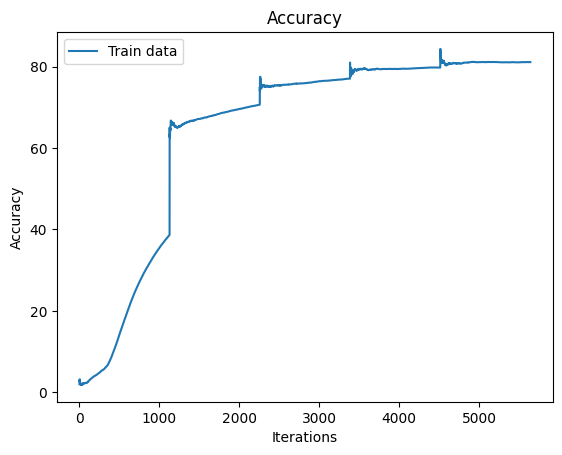

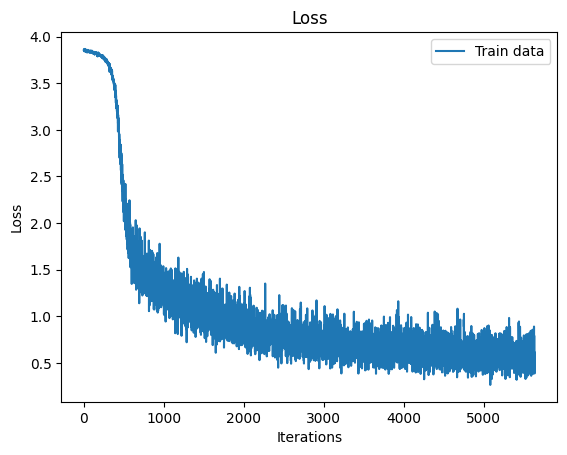

In [12]:
# YOUR CODE HERE
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

train_dataset = dsets.EMNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True,                            
                            split="balanced")

# test_dataset = dsets.EMNIST(root='./data', 
#                            train=False, 
#                            transform=transforms.ToTensor())


batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
# num_epochs = int(num_epochs)
num_epochs = 5

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

# test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
#                                           batch_size=batch_size, 
#                                           shuffle=False)

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32 * 4 * 4, 47) 
    # 100, 32, 4, 4
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        # print("maxpool shape = ", out.size())
        # Resize
        # Original size: (100, 32, 7, 7)
        # out.size(0): 100
        # New out size: (100, 32*7*7)
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out


model = CNNModel()

if torch.cuda.is_available():
    model.cuda()

loss_fn = nn.CrossEntropyLoss()

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


def train(train_loader, model, loss_fn, optimizer):
    # iter = 0
    # for epoch in range(num_epochs):
    train_correct = 0
    train_total = 0
    for i, (images, labels) in enumerate(train_loader):

        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images)
            labels = Variable(labels)
        # print("images size = ", images.size())
        # print("labesl size = ", labels.size())
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        # print("outputs  = ", outputs)
        # Calculate Loss: softmax --> cross entropy loss
        train_loss = loss_fn(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        train_loss.backward()
        
        # Updating parameters
        optimizer.step()
        
            # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        
        # Total number of labels
        train_total += labels.size(0)
        
        # Total correct predictions
        if torch.cuda.is_available():
            train_correct += (predicted.cpu() == labels.cpu()).sum()
        else:
            train_correct += (predicted == labels).sum()

        train_accuracy = 100 * train_correct / train_total
        train_acc_arr.append(train_accuracy)
        train_loss_arr.append(train_loss.detach().numpy())
        # itr_arr.append(passes)
        # passes += 1
        # print("Loss = ", train_loss)
        # print("Acc = ", train_accuracy)
    # return train_acc_arr.detach().numpy(), train_loss_arr.detach().numpy()


# def test(test_loader, model, loss_fn):           
# # Calculate Accuracy         
#     test_correct = 0
#     test_total = 0
#     # Iterate through test dataset
#     for images, labels in test_loader:

#         if torch.cuda.is_available():
#             images = Variable(images.cuda())
#         else:
#             images = Variable(images)
        
#         # Forward pass only to get logits/output
#         outputs = model(images)
        
#         # Loss
#         test_loss = loss_fn(outputs, labels)

#         # Get predictions from the maximum value
#         _, predicted = torch.max(outputs.data, 1)
        
#         # Total number of labels
#         test_total += labels.size(0)
        
#         # Total correct predictions
#         if torch.cuda.is_available():
#             test_correct += (predicted.cpu() == labels.cpu()).sum()
#         else:
#             test_correct += (predicted == labels).sum()
    
#     test_accuracy = 100 * test_correct / test_total
            
            
            # Print Loss
            # print('Iteration: {}'.format(iter))
            # print('Loss: {}'.format(loss.item()))
            # print('Accuracy: {}'.format(accuracy.item()))

train_acc_arr = []
train_loss_arr = []
itr_arr = []

for t in range(num_epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    # acc, l = train(train_loader, model, loss_fn, optimizer)
    # train_acc_arr.append(acc)
    # train_loss_arr.append(l)
    # itr_arr.append(t)
print("Done!")

import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(len(train_acc_arr)),train_acc_arr, label = "Train data")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(np.arange(len(train_acc_arr)),train_loss_arr, label = "Train data")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss")
plt.show()
# raise NotImplementedError()

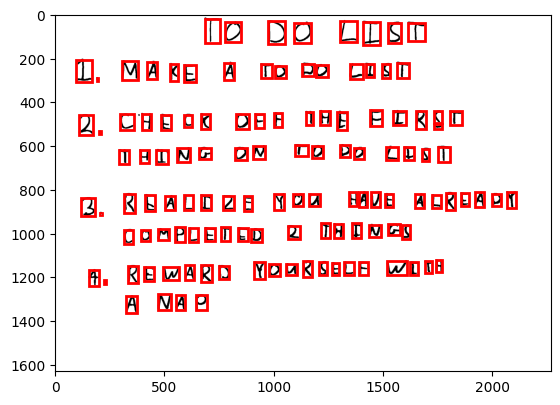

T0D0LIS
IIMhKEhT0D0LIST
2IICHHIENCKE00FNFrI0HED0FLItRSrtTT
3ICR0FHhPLLIET2tEDY20UIHHIhVNEEShLREADY
4IREWhRDY0URSELFWIIH
ANhP


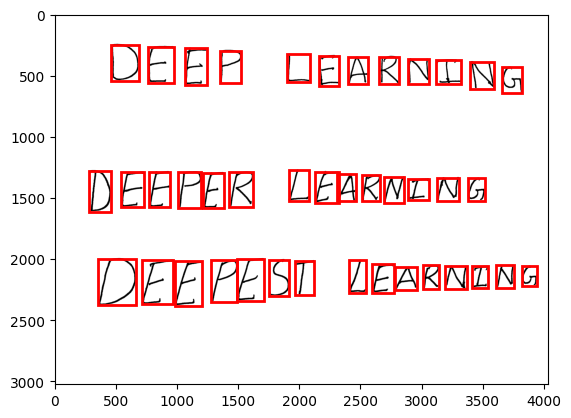

FFPWEARNING
DFFPFKLEARNING
NFFPFST1EAKNING


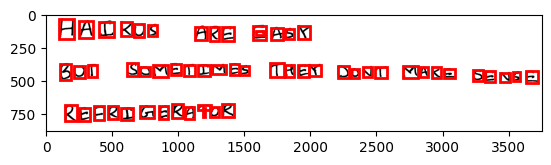

HAIKUSAREEASX
BUTSOMET2MESTREXDDNTMAKESENSE
REFR2GERAIM0R


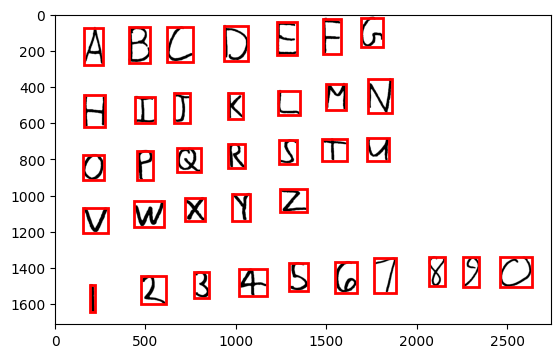

ABCDEF
HIJKLMN
0PQRSTV
VWXYZ
1234S6789Q


In [15]:
# load the weights
# run the crops through your neural network and print them out
import skimage
import skimage.io
import pickle
import string
import numpy as np
from ipynb.fs.defs.q3 import *

# letters = np.array([_ for _ in string.ascii_uppercase[:26]] + [str(_) for _ in range(10)])
letters = train_dataset.classes
params = pickle.load(open('q2_weights.pickle','rb'))
# YOUR CODE HERE
for img in os.listdir('images'):
    im1 = skimage.img_as_float(skimage.io.imread(os.path.join('images',img)))
    bboxes, bw = findLetters(im1)

    plt.imshow(bw, cmap="gray")
    for bbox in bboxes:
        minr, minc, maxr, maxc = bbox
        rect = matplotlib.patches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
    plt.show()

    sorted_temp = sorted(bboxes, key = lambda x:x[2])
    lines = 1
    max_chars_in_line = 0
    chars_in_line = 0
    # for i in range(1,len(sorted_temp)):
    #     if abs(sorted_temp[i-1][2] - sorted_temp[i][2]) > 100:
    #         # Append in the next row of sorted y
    #         lines += 1
    #         max_chars_in_line = max(chars_in_line, max_chars_in_line)
    #         chars_in_line = 0
    #     # sorted_y[x][y] = sorted_temp[i]
    #     chars_in_line += 1

    sorted_lines = []

    # print("lines = ", lines)
    # print("max cchars in line = ", max_chars_in_line)
    # sorted_lines = np.ones((lines, max_chars_in_line, 4))*np.nan
    curr_line = 0
    curr_char_idx = 0
    chars_in_one_line = []
    for j in range(1,len(sorted_temp)):
        if abs(sorted_temp[j-1][2] - sorted_temp[j][2]) > 100:
            sorted_lines.append(chars_in_one_line)
            chars_in_one_line = []
            curr_line += 1
            curr_char_idx = 0
        # print("currline = ", curr_line)
        # print("len = ", len(sorted_temp))
        chars_in_one_line.append(sorted_temp[j])
        curr_char_idx += 1

    sorted_lines.append(chars_in_one_line)

    for k in range(len(sorted_lines)):
        sorted_lines[k] = sorted(sorted_lines[k], key = lambda x:x[3])

    for i in sorted_lines:
        for j in i:
            patch = bw[j[0]:j[2],j[1]:j[3]]
            # plt.imshow(patch, cmap='gray')
            patch_ht = patch.shape[0]
            patch_wdt = patch.shape[1]
            pad_with = patch_ht-patch_wdt
            if pad_with > 0:
                patch = np.pad(patch, ((0,0),(pad_with//2, pad_with//2)), mode='constant', constant_values =1)
            elif pad_with < 0:
                patch = np.pad(patch, ((-pad_with//2, -pad_with//2),(0,0)), mode='constant', constant_values =1)

            patch = np.pad(patch, ((25,25),(25,25)), mode='constant', constant_values =1)
            patch = skimage.morphology.erosion(patch)
            patch = skimage.transform.resize(patch, (32,32))
            # plt.imshow(patch, cmap='gray')
            patch = patch.transpose()

            # plt.show()
            patch = patch.reshape(1,1,32,32)
            patch = patch[:,:,2:-2,2:-2]
            patch = 1-patch
            # post_act = forward(patch,params,'layer1',sigmoid)
            # pred_output = forward(post_act,params,'output',softmax)
            patch = torch.from_numpy(patch).float()
            output = model(patch)
            output = output.detach().numpy()
            pred_idx = np.argmax(output[0])
            detected_char = letters[pred_idx]
            print(detected_char, end='')
            # break
        # break
        print('')
    # break
        
    
# raise NotImplementedError()

### Q4.2 Fine Tuning

#### Q4.2.1 (10 Points Code+WriteUp)
 
Fine-tune a single layer classifier using pytorch on the [flowers 17](http://www.robots.ox.ac.uk/~vgg/data/flowers/17/index.html) (or [flowers 102](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html)!) dataset using [squeezenet1\_1](https://pytorch.org/docs/stable/torchvision/models.html), as well as an architecture you've designed yourself (*3 conv layers, followed 2 fc layers, it's standard [slide 6](http://cs231n.stanford.edu/slides/2018/cs231n_2018_lecture09.pdf)*) and trained from scratch. How do they compare? 
    
We include a script in `scripts/` to fetch the flowers dataset and extract it in a way that [PyTorch ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) can consume it, see [an example](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#afterword-torchvision), from **data/oxford-flowers17**. You should look at how SqueezeNet is [defined](https://github.com/pytorch/vision/blob/master/torchvision/models/squeezenet.py), and just replace the classifier layer. There exists a pretty good example for [fine-tuning](https://gist.github.com/jcjohnson/6e41e8512c17eae5da50aebef3378a4c) in PyTorch.

<font color="red">**Please include your answer to HW3:PDF**</font>

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

Using cache found in /home/harshad/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 1
-------------------------------
Loss =  tensor(3.1553, grad_fn=<NllLossBackward0>)
Acc =  tensor(12.5000)
Loss =  tensor(3.3730, grad_fn=<NllLossBackward0>)
Acc =  tensor(6.2500)
Loss =  tensor(3.0578, grad_fn=<NllLossBackward0>)
Acc =  tensor(4.1667)
Loss =  tensor(3.6472, grad_fn=<NllLossBackward0>)
Acc =  tensor(3.1250)
Loss =  tensor(4.0773, grad_fn=<NllLossBackward0>)
Acc =  tensor(2.5000)
Loss =  tensor(2.7891, grad_fn=<NllLossBackward0>)
Acc =  tensor(4.1667)
Loss =  tensor(2.6515, grad_fn=<NllLossBackward0>)
Acc =  tensor(7.1429)
Loss =  tensor(3.0181, grad_fn=<NllLossBackward0>)
Acc =  tensor(6.2500)
Loss =  tensor(2.6114, grad_fn=<NllLossBackward0>)
Acc =  tensor(8.3333)
Loss =  tensor(3.1579, grad_fn=<NllLossBackward0>)
Acc =  tensor(8.7500)
Loss =  tensor(2.5680, grad_fn=<NllLossBackward0>)
Acc =  tensor(10.2273)
Loss =  tensor(2.3021, grad_fn=<NllLossBackward0>)
Acc =  tensor(12.5000)
Loss =  tensor(3.0852, grad_fn=<NllLossBackward0>)
Acc =  tensor(12.5000)
Loss = 

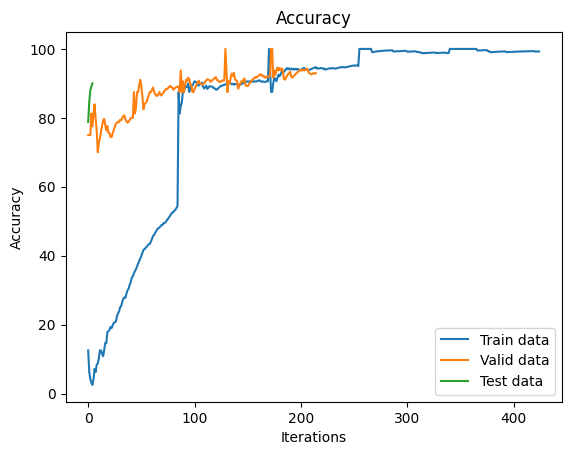

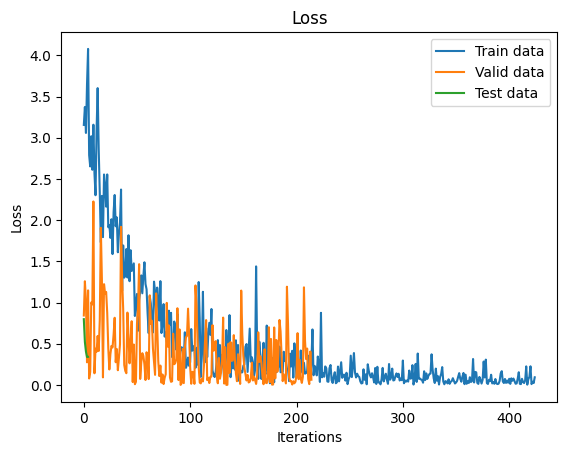

In [7]:
# YOUR CODE HERE
import torch
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

model = torch.hub.load('pytorch/vision:v0.10.0', 'squeezenet1_1', pretrained=True)

final_conv = nn.Conv2d(512, 17, kernel_size=1)
model.classifier = nn.Sequential(
        nn.Dropout(p=0.5), final_conv, nn.ReLU(inplace=True), nn.AdaptiveAvgPool2d((1, 1))
    )

for param in model.parameters():
    param.requires_grad = False
for param in model.classifier.parameters():
    param.requires_grad = True

# Construct an Optimizer object for updating the last layer only.
optimizer = torch.optim.Adam(model.classifier.parameters(), lr=1e-3)

from PIL import Image
from torchvision import transforms
# input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
# input_tensor = preprocess(input_image)
# input_batch = input_tensor.unsqueeze(0) 
batch_size = 8
train_dataloader = torch.utils.data.DataLoader(dsets.ImageFolder('./data/oxford-flowers17/train/', transform=preprocess), batch_size=batch_size, shuffle=True)
valid_dataloader = torch.utils.data.DataLoader(dsets.ImageFolder('./data/oxford-flowers17/val/', transform=preprocess), batch_size=batch_size, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(dsets.ImageFolder('./data/oxford-flowers17/test/', transform=preprocess), batch_size=340, shuffle=False)
# print("len of data set = ", valid_dataloader.size())

loss_fn = nn.CrossEntropyLoss()

def train(train_loader, model, loss_fn, optimizer):
    # iter = 0
    # for epoch in range(num_epochs):
    train_correct = 0
    train_total = 0
    for i, (images, labels) in enumerate(train_loader):

        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images)
            labels = Variable(labels)
        # print("images size = ", images.size())
        # print("labesl size = ", labels.size())
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        # print("outputs  = ", outputs)
        # Calculate Loss: softmax --> cross entropy loss
        train_loss = loss_fn(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        train_loss.backward()
        
        # Updating parameters
        optimizer.step()
        
            # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        
        # Total number of labels
        train_total += labels.size(0)
        
        # Total correct predictions
        if torch.cuda.is_available():
            train_correct += (predicted.cpu() == labels.cpu()).sum()
        else:
            train_correct += (predicted == labels).sum()

        train_accuracy = 100 * train_correct / train_total
        train_acc_arr.append(train_accuracy)
        train_loss_arr.append(train_loss.detach().numpy())
        # itr_arr.append(passes)
        # passes += 1
        print("Loss = ", train_loss)
        print("Acc = ", train_accuracy)
    # return train_acc_arr.detach().numpy(), train_loss_arr.detach().numpy()

def valid(valid_loader, model, loss_fn):
    # iter = 0
    # for epoch in range(num_epochs):
    valid_correct = 0
    valid_total = 0
    for i, (images, labels) in enumerate(valid_loader):

        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images)
            labels = Variable(labels)
        # print("images size = ", images.size())
        # print("labesl size = ", labels.size())
        # Clear gradients w.r.t. parameters
        # optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        # print("outputs  = ", outputs)
        # Calculate Loss: softmax --> cross entropy loss
        valid_loss = loss_fn(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        # valid_loss.backward()
        
        # Updating parameters
        # optimizer.step()
        
            # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        
        # Total number of labels
        valid_total += labels.size(0)
        
        # Total correct predictions
        if torch.cuda.is_available():
            valid_correct += (predicted.cpu() == labels.cpu()).sum()
        else:
            valid_correct += (predicted == labels).sum()

        valid_accuracy = 100 * valid_correct / valid_total
        valid_acc_arr.append(valid_accuracy)
        valid_loss_arr.append(valid_loss.detach().numpy())
        # itr_arr.append(passes)
        # passes += 1
        print("Loss = ", valid_loss)
        print("Acc = ", valid_accuracy)
    # return valid_acc_arr.detach().numpy(), valid_loss_arr.detach().numpy()


def test(test_loader, model, loss_fn):           
# Calculate Accuracy         
    test_correct = 0
    test_total = 0
    # Iterate through test dataset
    for images, labels in test_loader:

        if torch.cuda.is_available():
            images = Variable(images.cuda())
        else:
            images = Variable(images)
        
        # Forward pass only to get logits/output
        outputs = model(images)
        
        # Loss
        test_loss = loss_fn(outputs, labels)

        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        
        # Total number of labels
        test_total += labels.size(0)
        
        # Total correct predictions
        if torch.cuda.is_available():
            test_correct += (predicted.cpu() == labels.cpu()).sum()
        else:
            test_correct += (predicted == labels).sum()

        test_accuracy = 100 * test_correct / test_total
        test_acc_arr.append(test_accuracy)
        test_loss_arr.append(test_loss.detach().numpy())
    
            
            
            # Print Loss
            # print('Iteration: {}'.format(iter))
            # print('Loss: {}'.format(loss.item()))
            # print('Accuracy: {}'.format(accuracy.item()))

train_acc_arr = []
valid_acc_arr = []
test_acc_arr = []
train_loss_arr = []
test_loss_arr =[]
valid_loss_arr = []
itr_arr = []

num_epochs = 5
for t in range(num_epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    valid(valid_dataloader, model, loss_fn)
    test(test_dataloader, model, loss_fn)
    # acc, l = train(train_loader, model, loss_fn, optimizer)
    # train_acc_arr.append(acc)
    # train_loss_arr.append(l)
    # itr_arr.append(t)
print("Done!")

import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(len(train_acc_arr)),train_acc_arr, label = "Train data")
plt.plot(np.arange(len(valid_acc_arr)),valid_acc_arr, label = "Valid data")
plt.plot(np.arange(len(test_acc_arr)),test_acc_arr, label = "Test data")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(np.arange(len(train_acc_arr)),train_loss_arr, label = "Train data")
plt.plot(np.arange(len(valid_acc_arr)),valid_loss_arr, label = "Valid data")
plt.plot(np.arange(len(test_acc_arr)),test_loss_arr, label = "Test data")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss")
plt.show()
# raise NotImplementedError()
# raise NotImplementedError()

Epoch 1
-------------------------------
test accuracy =  tensor(12.9412)
Epoch 2
-------------------------------
test accuracy =  tensor(23.8235)
Epoch 3
-------------------------------
test accuracy =  tensor(34.7059)
Epoch 4
-------------------------------
test accuracy =  tensor(35.)
Epoch 5
-------------------------------
test accuracy =  tensor(40.5882)
Epoch 6
-------------------------------
test accuracy =  tensor(40.2941)
Epoch 7
-------------------------------
test accuracy =  tensor(44.7059)
Epoch 8
-------------------------------
test accuracy =  tensor(42.9412)
Epoch 9
-------------------------------
test accuracy =  tensor(41.7647)
Epoch 10
-------------------------------
test accuracy =  tensor(44.7059)
Epoch 11
-------------------------------
test accuracy =  tensor(42.3529)
Epoch 12
-------------------------------
test accuracy =  tensor(44.1176)
Epoch 13
-------------------------------
test accuracy =  tensor(45.2941)
Epoch 14
-------------------------------
test accur

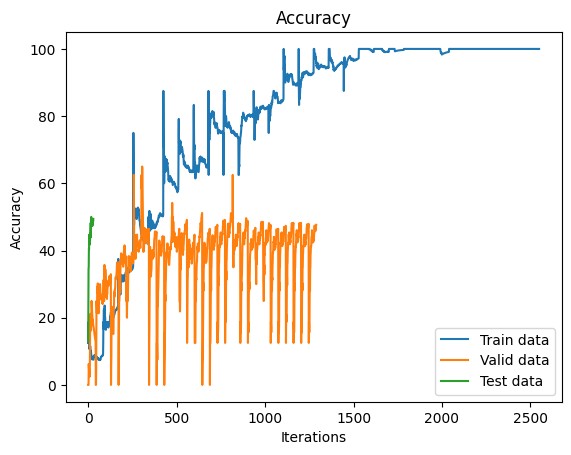

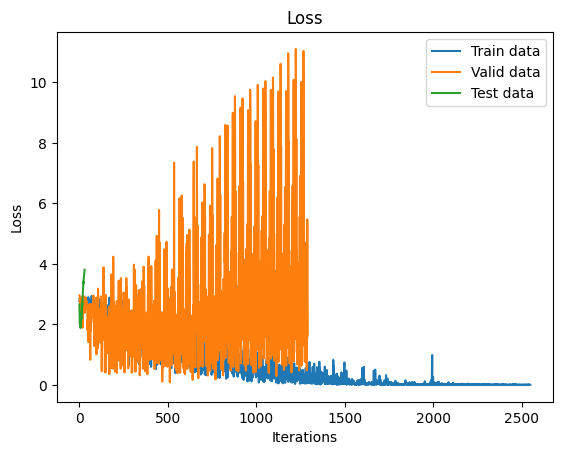

In [1]:
# YOUR CODE HERE
# YOUR CODE HERE
import torch
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

# model = torch.hub.load('pytorch/vision:v0.10.0', 'squeezenet1_1', pretrained=True)

# final_conv = nn.Conv2d(512, 17, kernel_size=1)
# model.classifier = nn.Sequential(
#         nn.Dropout(p=0.5), final_conv, nn.ReLU(inplace=True), nn.AdaptiveAvgPool2d((1, 1)))


# for param in model.parameters():
#     param.requires_grad = False
# for param in model.classifier.parameters():
#     param.requires_grad = True

# Construct an Optimizer object for updating the last layer only.

# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

from PIL import Image
from torchvision import transforms
# input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
# input_tensor = preprocess(input_image)
# input_batch = input_tensor.unsqueeze(0) 

batch_size = 8
train_dataloader = torch.utils.data.DataLoader(dsets.ImageFolder('./data/oxford-flowers17/train/', transform=preprocess), batch_size=batch_size, shuffle=True)
valid_dataloader = torch.utils.data.DataLoader(dsets.ImageFolder('./data/oxford-flowers17/val/', transform=preprocess), batch_size=batch_size, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(dsets.ImageFolder('./data/oxford-flowers17/test/', transform=preprocess), batch_size=340, shuffle=False)
# print("len of data set = ", valid_dataloader.size())

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        self.cnn3 = nn.Conv2d(128, 64, kernel_size=5, stride=1, padding=0)
        self.relu3 = nn.ReLU()
        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(153664, 47) 
        self.fc2 = nn.Linear(47, 17)
    # 100, 32, 4, 4
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)

        out = self.cnn3(out)
        out = self.relu3(out)
        # print("maxpool shape = ", out.size())
        # Resize
        # Original size: (100, 32, 7, 7)
        # out.size(0): 100
        # New out size: (100, 32*7*7)
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        # print("first conv shape = ", out.size())
        out = self.fc2(out)
        
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''

model = CNNModel()
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

def train(train_loader, model, loss_fn, optimizer):
    # iter = 0
    # for epoch in range(num_epochs):
    train_correct = 0
    train_total = 0
    for i, (images, labels) in enumerate(train_loader):

        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images)
            labels = Variable(labels)
        # print("images size = ", images.size())
        # print("labesl size = ", labels.size())
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        # print("outputs  = ", outputs)
        # Calculate Loss: softmax --> cross entropy loss
        train_loss = loss_fn(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        train_loss.backward()
        
        # Updating parameters
        optimizer.step()
        
            # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        
        # Total number of labels
        train_total += labels.size(0)
        
        # Total correct predictions
        if torch.cuda.is_available():
            train_correct += (predicted.cpu() == labels.cpu()).sum()
        else:
            train_correct += (predicted == labels).sum()

        train_accuracy = 100 * train_correct / train_total
        train_acc_arr.append(train_accuracy)
        train_loss_arr.append(train_loss.detach().numpy())
        # itr_arr.append(passes)
        # passes += 1
        # print("Loss = ", train_loss)
        # print("Acc = ", train_accuracy)
    # return train_acc_arr.detach().numpy(), train_loss_arr.detach().numpy()

def valid(valid_loader, model, loss_fn):
    # iter = 0
    # for epoch in range(num_epochs):
    valid_correct = 0
    valid_total = 0
    for i, (images, labels) in enumerate(valid_loader):

        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images)
            labels = Variable(labels)
        # print("images size = ", images.size())
        # print("labesl size = ", labels.size())
        # Clear gradients w.r.t. parameters
        # optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        # print("outputs  = ", outputs)
        # Calculate Loss: softmax --> cross entropy loss
        valid_loss = loss_fn(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        # valid_loss.backward()
        
        # Updating parameters
        # optimizer.step()
        
            # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        
        # Total number of labels
        valid_total += labels.size(0)
        
        # Total correct predictions
        if torch.cuda.is_available():
            valid_correct += (predicted.cpu() == labels.cpu()).sum()
        else:
            valid_correct += (predicted == labels).sum()

        valid_accuracy = 100 * valid_correct / valid_total
        valid_acc_arr.append(valid_accuracy)
        valid_loss_arr.append(valid_loss.detach().numpy())
        # itr_arr.append(passes)
        # passes += 1
        # print("Loss = ", valid_loss)
        # print("Acc = ", valid_accuracy)
    # return valid_acc_arr.detach().numpy(), valid_loss_arr.detach().numpy()


def test(test_loader, model, loss_fn):           
# Calculate Accuracy         
    test_correct = 0
    test_total = 0
    # Iterate through test dataset
    for images, labels in test_loader:

        if torch.cuda.is_available():
            images = Variable(images.cuda())
        else:
            images = Variable(images)
        
        # Forward pass only to get logits/output
        outputs = model(images)
        
        # Loss
        test_loss = loss_fn(outputs, labels)

        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        
        # Total number of labels
        test_total += labels.size(0)
        
        # Total correct predictions
        if torch.cuda.is_available():
            test_correct += (predicted.cpu() == labels.cpu()).sum()
        else:
            test_correct += (predicted == labels).sum()

        test_accuracy = 100 * test_correct / test_total
        test_acc_arr.append(test_accuracy)
        test_loss_arr.append(test_loss.detach().numpy())
    print("test accuracy = ", test_accuracy)
            
            
            # Print Loss
            # print('Iteration: {}'.format(iter))
            # print('Loss: {}'.format(loss.item()))
            # print('Accuracy: {}'.format(accuracy.item()))

train_acc_arr = []
valid_acc_arr = []
test_acc_arr = []
train_loss_arr = []
test_loss_arr =[]
valid_loss_arr = []
itr_arr = []

num_epochs = 5
for t in range(num_epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    valid(valid_dataloader, model, loss_fn)
    test(test_dataloader, model, loss_fn)
    # acc, l = train(train_loader, model, loss_fn, optimizer)
    # train_acc_arr.append(acc)
    # train_loss_arr.append(l)
    # itr_arr.append(t)
print("Done!")

import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(len(train_acc_arr)),train_acc_arr, label = "Train data")
plt.plot(np.arange(len(valid_acc_arr)),valid_acc_arr, label = "Valid data")
plt.plot(np.arange(len(test_acc_arr)),test_acc_arr, label = "Test data")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(np.arange(len(train_acc_arr)),train_loss_arr, label = "Train data")
plt.plot(np.arange(len(valid_acc_arr)),valid_loss_arr, label = "Valid data")
plt.plot(np.arange(len(test_acc_arr)),test_loss_arr, label = "Test data")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss")
plt.show()
# raise NotImplementedError()
# raise NotImplementedError()
# raise NotImplementedError()